# Aufgabe 2.1

In einer Klasse wurden in einer Statistik-Prüfung folgende Noten geschrieben:

```
4.2, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 6, 4, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 5.5, 4.2, 4.9, 5.1
```

In [25]:
import pandas as pd
import numpy as np
grades = pd.Series([4.2, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 6, 4, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 5.5, 4.2, 4.9, 5.1])

**a) Ändern Sie drei Noten im Datensatz so ab, dass der Median gleich bleibt, aber
der Mittelwert sich stark ändert.**

In [15]:
print("Mittel: " + str(grades.mean()) + ", Median: " + str(grades.median()))

Mittel: 4.5125, Median: 4.65


In [29]:
sorted = grades.sort_values()
sorted.index = np.arange(1, sorted.size+1) # index anpassen
s = sorted.size / 2 -1
sorted[s-1] = sorted[s-2] = sorted[s-3] = 1

In [30]:
print("Mittel: " + str(sorted.mean()) + ", Median: " + str(sorted.median()))

Mittel: 4.120833333333334, Median: 4.65


**b) Erstellen Sie zu den beiden Datensätzen je ein Histogramm und einen Boxplot.
Verwenden Sie `plt.subplot(...)` aus Aufgabe 1.**

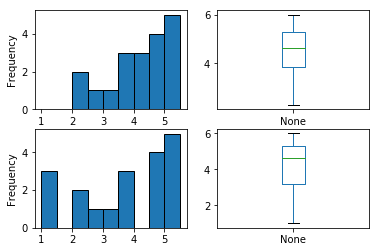

In [49]:
import matplotlib.pyplot as plt

plt.subplot(221)
grades.plot(kind="hist",
            bins=(np.arange(1,6,.5)),
            edgecolor="black")
plt.subplot(222)
grades.plot(kind="box")
plt.subplot(223)
sorted.plot(kind="hist",
            bins=(np.arange(1,6,.5)),
            edgecolor="black")
plt.subplot(224)
sorted.plot(kind="box")
plt.show()

# Aufgabe 2.2

21 Labors bestimmten den Kupfergehalt von 9 verschiedenen Klärschlammproben.
Die Daten stehen in der auf Ilias abgelegten Datei `klaerschlamm.dat` zur Verfügung. Die erste Spalte bezeichnet das Labor, die restlichen 9 Spalten sind die verschiedenen Klärschlammproben. Die Daten (in mg/kg) können mit dem Befehl

```
schlamm = pd.read_table(r"*klaerschlamm.dat", sep=" ", index_col=0)
```

eingelesen werden. Die erste Spalte Labor wollen wir
noch entfernen, da sie uns nicht interessiert.

In [53]:
schlamm = pd.read_table(r"./data/klaerschlamm.dat", sep=" ", index_col=0)
schlamm = schlamm.drop("Labor",1)
schlamm.head()

,Pr1,Pr2,Pr3,Pr4,Pr5,Pr6,Pr7,Pr8,Pr9
1,233,491,428,376,200,364,474,444,351
2,253,530,453,389,191,402,495,453,371
3,240,530,460,390,200,390,480,440,350
4,243,518,456,389,186,385,483,459,369
5,244,521,446,392,193,385,481,451,357


**a) Erstellen Sie für jede Probe einen Boxplot, und berechnen Sie jeweils das arithmetische Mittel und den Median.**

- Bei welchen Proben gibt es Ausreisser, und wo unterscheiden sich arithmetisches Mittel und Median wesentlich?

- Bei welchen der 9 Proben ist es plausibel, dass die wahre Konzentration unter 400 mg/kg liegt?

In [56]:
schlamm.describe()

,Pr1,Pr2,Pr3,Pr4,Pr5,Pr6,Pr7,Pr8,Pr9
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,246.142857,511.428571,443.428571,389.238095,188.238095,394.857143,465.523810,449.952381,388.904762
std,18.210672,76.962050,34.156363,56.642656,16.866845,56.642110,91.361162,57.069673,104.159927
min,216.000000,268.000000,378.000000,223.000000,157.000000,337.000000,110.000000,323.000000,319.000000
25%,239.000000,491.000000,422.000000,373.000000,178.000000,366.000000,456.000000,423.000000,350.000000
50%,244.000000,521.000000,446.000000,390.000000,188.000000,385.000000,481.000000,451.000000,369.000000
75%,257.000000,530.000000,459.000000,405.000000,200.000000,393.000000,493.000000,467.000000,382.000000
max,296.000000,732.000000,548.000000,562.000000,221.000000,557.000000,642.000000,639.000000,819.000000


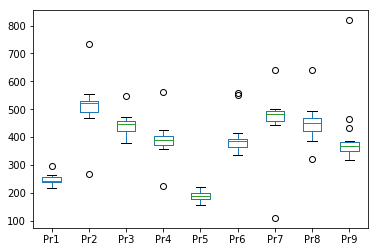

In [57]:
schlamm.plot(kind='Box')

> TODO

**b) Erstellen Sie für jedes Labor einen Boxplot der Messfehler.**

Unter dem Messfehler eines Labors bei einer Probe verstehen wir den gemessenen Wert minus den Median über alle Labors.

- Welche der 21 Labors haben systematische Fehler in ihrem Analyseverfahren?
- Welche haben grosse Zufallsfehler, und bei welchen Labors ist die Qualität der Analysen besonders gut?

Python-Hinweise: Wir ziehen zunächst von jeder Spalte den Median ab

```
schlamm_centered = schlamm - schlamm.median()
```

und zeichnen den Boxplot mit vertauschten Zeilen und Spalten. Dies geschieht
mit dem Attribut `.T`

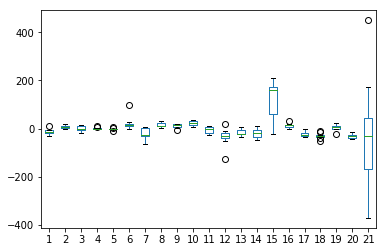

In [58]:
schlamm_centered = schlamm - schlamm.median()
schlamm_centered.T.plot(kind="box")

> TODO

# Aufgabe 2.3

Für drei Stichproben vom Umfang $n = 100$ wurden je ein Boxplot und die empirische Verteilungsfunktion gezeichnet. Ordnen Sie die drei Boxplots den entsprechenden empirischen Verteilungsfunktionen zu:

!["Boxplotterl"](./img/box.png)

1. --> c
2. --> b
3. --> a

# Aufgabe 2.4

Edwin Hubble untersuchte seit 1920 am Mount Wilson Observatory die Eigenschaften
von Galaxien ausserhalb der Milchstrasse. Mit Überraschung bemerkte er einen Zusammenhang zwischen der Distanz einer Galaxie zur Erde und dessen Geschwindigkeit, sich von der Erde fortzubewegen (Fluchtgeschwindigkeit). 

Die Fluchtgeschwindigkeit ist in Kilometer pro Sekunde angegeben und konnte aufgrund der Rotverschiebung im Lichtspektrum der Galaxien mit grosser Genauigkeit bestimmt werden. Die Distanz einer Galaxie zur Erde wird in Megaparsec (Mpc) gemessen: ein Megaparsec entspricht etwa $3.09 × 1010 m$. Die Distanzen werden durch Vergleich
der mittleren Luminosität von Galaxien mit der Luminosität von bestimmten bekannten Sternen bestimmt, wobei diese Methode relativ ungenau ist.

**a) Erstellen Sie ein Streudiagramm, in dem Sie die Distanz versus Fluchtgeschwindigkeit aufzeichnen.**

In [64]:
hubble = pd.read_table("./data/hubble.txt", sep=" ")

**b) Bestimmen Sie mit dem Befehl `np.polyfit(...)` die Koeffizienten $β_0$ und $β_1$ für die Regressionsgerade**

$$y = β0 + β1x$$

**wobei y die Distanz und x die Fluchtgeschwindigkeit bezeichnet.**

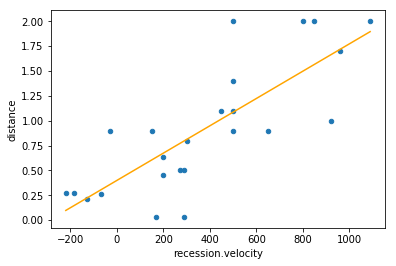

In [70]:
hubble.plot(kind='scatter', x='recession.velocity', y='distance')
b,a = np.polyfit(x=hubble['recession.velocity'], y=hubble['distance'], deg=1)
x = np.linspace(hubble["recession.velocity"].min(), hubble["recession.velocity"].max())
plt.plot(x, a+b*x, c="orange")
plt.show()

**c) Bestimmen Sie noch den Korrelationskoeffizienten und interpretieren Sie diesen.**

In [73]:
hubble.corr().iloc[0,1]

0.7896394879353181

Da scheints nur a bisserl zu korreliern.

# Aufgabe 2.5

Wir betrachten eine Studie, die 1979 in den Vereinigten Staaten durchgeführt wurde (National Longitudinal Study of Youth, NLSY79): von 2584 Amerikanern im Jahr 1981 wurde der Intelligenzquotient (gemäss AFQT - armed forces qualifying test score) gemessen; 2006 wurden dieselben Personen nach ihrem jährlichen Einkommen im Jahr 2005 und der Anzahl Jahre Schulbildung befragt. Uns interessiert hier natürlich, ob ein hoher IQ oder eine lange Schulbildung zu einem höheren Einkommen
führen. In der auf Ilias abgelegten Datei `income.dat` finden Sie den Datensatz mit dem Einkommen, der Anzahl Jahre abgeschlossener Schulbildung und den ermittelten Intelligenzquotienten von 2584 Amerikanern.

**a) Lesen Sie den Datensatz `income.dat` ein und generieren Sie Streudiagramme, in welchen das Einkommen versus Anzahl Jahre Schulbildung und Einkommen versus Intelligenzquotient aufgetragen sind.**

In [75]:
income = pd.read_table(r"./data/income.dat", sep=" ")

In [81]:
income.describe()

,AFQT,Educ,Income2005
count,2584.000000,2584.000000,2584.000000
mean,54.436702,13.890867,49416.998839
std,27.761409,2.503519,46727.925028
min,0.000000,6.000000,63.000000
25%,31.475000,12.000000,23000.000000
50%,56.801000,13.000000,38231.000000
75%,78.071750,16.000000,61000.000000
max,100.000000,20.000000,703637.000000


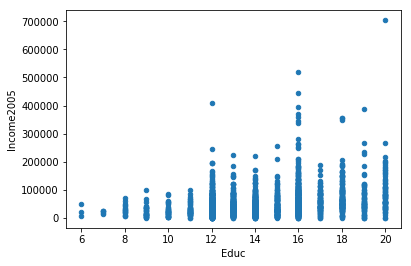

In [79]:
income.plot(kind='scatter', x='Educ', y='Income2005')

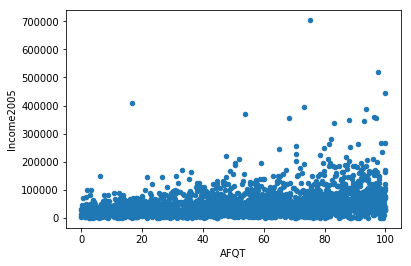

In [82]:
income.plot(kind='scatter', x='AFQT', y='Income2005')

**b) Bestimmen Sie die Parameter a und b des linearen Modells $y = a + bx$, wobei $y$ das Einkommen bezeichnet und $x$ die Anzahl Jahre Schulbildung.**

a: -40199.57535260002
b: 6451.4745559458015


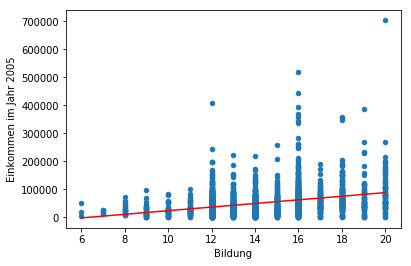

In [90]:
income.plot(kind='scatter', x='Educ', y='Income2005')
b,a = np.polyfit(income['Educ'] , income['Income2005'], deg=1)
print("a: " + str(a) + "\nb: " + str(b))
x = np.linspace(income["Educ"].min(),income["Educ"].max())
plt.plot(x, a+b*x, c="red")
plt.xlabel("Bildung")
plt.ylabel("Einkommen im Jahr 2005")
plt.show()

Wie interpretieren Sie die Parameter $a$ und $b$?

 > TODO

**c) Berechnen Sie die Korrelation zwischen Einkommen und Anzahl Jahre Schulbildung. Wie angebracht ist ein Regressionsmodell für diesen Datensatz?**

In [91]:
income.corr()

,AFQT,Educ,Income2005
AFQT,1.000000,0.595160,0.308153
Educ,0.595160,1.000000,0.345647
Income2005,0.308153,0.345647,1.000000


In [92]:
income.corr().iloc[1,2]

0.3456474135981061

Wie angebracht ist ein Regressionsmodell für diesen Datensatz?

> TODO

# Aufgabe 2.6

In dieser Aufgabe betrachten wir 4 Datensätze, die von Anscombe konstruiert wurden.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

**a) Stellen Sie jeden der 4 Datensätze als Streudiagramm dar, zeichnen Sie die Regressionsgerade ein und kommentieren Sie die Ergebnisse. Verwenden Sie wieder `plt.subplot(...)` aus Aufgabe 1 und `plt.scatter(...)`.**

<function matplotlib.pyplot.show(*args, **kw)>

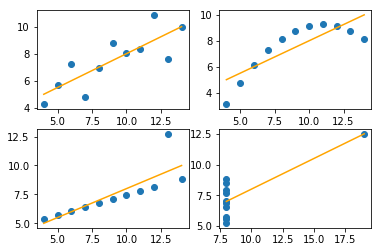

In [25]:
#import matplotlib.pyplot as plt



plt.subplot(221)
plt.scatter(x, y1)
b1,a1 = np.polyfit(x, y1, deg=1)
cx1 = np.linspace(x.min(), x.max())
cy1 = a1 + b1*cx
plt.plot(cx1, cy1, color='orange')

plt.subplot(222)
plt.scatter(x, y2)
b2,a2 = np.polyfit(x, y2, deg=1)
cy2 = a2 + b2*cx
plt.plot(cx1, cy2, color='orange')

plt.subplot(223)
plt.scatter(x, y3)
b3,a3 = np.polyfit(x, y3, deg=1)
cy3 = a3 + b3*cx
plt.plot(cx1, cy3, color='orange')

plt.subplot(224)
plt.scatter(x4, y4)
b4,a4 = np.polyfit(x4, y4, deg=1)
cx4 = np.linspace(x4.min(), x4.max())
cy4 = a4 + b4*cx4
plt.plot(cx4, cy4, color='orange')
plt.show

**b) Vergleichen Sie die Schätzungen von $β_0$ und $β_1$, wobei $y = β_0 + β_1x$.**

Die Schätzungen für die Koeffizienten $β_0$ und $β_1$ des linearen Regressionsmodells kann man mit `np.polyfit(...)` berechnen und numerisch auswerten.

In [27]:
data = np.matrix([[b1, a1], [b2, a2], [b3, a3], [b4, a4]])
pd.DataFrame(data, columns=["$b_0$", "$b_1$"])

,$b_0$,$b_1$
0,0.500091,3.000091
1,0.500000,3.000909
2,0.499727,3.002455
3,0.499909,3.001727


**c) Berechnen Sie die Korrelationskoeffizienten mit `np.corrcoef(...)`.**

In [101]:
pd.DataFrame([np.corrcoef(x,y1)[1][0],
np.corrcoef(x,y2)[1][0],
np.corrcoef(x,y3)[1][0],
np.corrcoef(x4,y4)[1][0]], columns=["r"])

,r
0,0.816421
1,0.816237
2,0.816287
3,0.816521


# Aufgabe 2.7

Der Datensatz der OECD enthält Messgrössen, die das Wohlergehen von Kindern in den Mitgliedsstaaten ermitteln sollen.

**a) Lesen Sie den Datensatz `child.csv` ein:**

In [32]:
from pandas import Series,DataFrame
import pandas as pd
data = pd.read_csv("./data/child.csv", sep=",", index_col=0)

**b) Bestimmen Sie den Mittelwert und Median der einzelnen Variablen mit dem Python-Attribut `.describe()`. Gibt es `NaN`’s im Datensatz?**

In [36]:
data.describe().loc[['mean','50%']]

,Average.disposable.income,Children.in.poor.homes,Educational.Deprivation,Overcrowding,Poor.environmental.conditions,Average.mean.literacy.score,Literacy.inequality,Youth.NEET.rate,Low.birth.weight,Infant.mortality,...,Vaccination.rates..pertussis.,Vaccination.rates.measles.,Physical.activity,Mortality.rates,Suicide.rates,Smoking,Drunkenness,Teenage.births,Bullying,Liking.school
mean,18.847713,12.372193,2.673333,31.950163,25.217498,496.317,1.665085,7.377778,6.643333,5.446667,...,93.775862,91.517241,20.134615,24.598966,6.856272,16.5125,15.225,15.5,10.979167,27.172
50%,21.107187,11.659053,1.500000,21.574977,25.487116,501.335,1.682739,6.200000,6.750000,4.200000,...,95.800000,94.000000,19.300000,23.150000,6.784772,16.6000,14.550,10.6,9.650000,25.600


In [53]:
print("Has NaN: " + str(data.isna().values.any()))

Has NaN: True


**c) Entfernen Sie alle Länder (Zeilen), die `NaN` enthalten.**

In [58]:
non_nan = data.dropna(axis='index')
non_nan

,Average.disposable.income,Children.in.poor.homes,Educational.Deprivation,Overcrowding,Poor.environmental.conditions,Average.mean.literacy.score,Literacy.inequality,Youth.NEET.rate,Low.birth.weight,Infant.mortality,...,Vaccination.rates..pertussis.,Vaccination.rates.measles.,Physical.activity,Mortality.rates,Suicide.rates,Smoking,Drunkenness,Teenage.births,Bullying,Liking.school
Austria,22.162446,6.166094,0.6,34.014601,20.154186,502.00,1.716942,6.9,6.8,4.2,...,83.0,74.0,19.6,24.57,9.482761,27.1,18.6,12.3,15.6,38.1
Belgium,21.401153,9.974720,1.0,12.614505,29.754526,510.33,1.740258,6.2,7.8,3.7,...,97.0,88.0,19.1,28.97,8.977713,16.7,13.9,7.8,12.2,21.6
Czech Republic,10.849270,10.270000,1.2,58.899347,29.748594,502.00,1.743012,5.3,6.7,3.4,...,98.7,96.6,22.0,24.92,6.212492,21.5,16.8,11.4,5.5,11.7
Denmark,23.175894,2.740000,0.7,17.552965,20.151467,501.00,1.594974,4.3,4.9,4.4,...,95.0,96.0,22.7,22.93,5.942231,15.0,24.8,6.6,8.0,25.6
Finland,22.027651,4.170000,1.0,15.228876,22.802362,552.67,1.475432,5.2,4.1,3.0,...,97.0,97.0,24.8,23.54,12.158687,22.0,22.4,9.7,8.0,16.1
France,18.960382,7.640000,1.2,20.284619,25.830298,493.00,1.728004,6.2,6.8,3.6,...,98.0,87.1,13.5,21.04,4.906704,19.0,11.2,6.7,13.6,21.4
Germany,19.894067,16.289270,0.5,19.967763,37.374708,505.00,1.719702,4.4,6.8,3.9,...,97.8,94.0,17.0,21.23,5.507378,19.5,15.1,9.8,13.9,34.9
Greece,17.183647,13.230296,6.1,54.922056,25.070654,464.00,1.722499,9.8,8.8,3.8,...,88.0,88.0,15.5,23.15,1.263026,16.5,10.3,8.7,22.0,25.6
Hungary,9.463130,8.724203,2.1,73.306021,22.213785,492.33,1.620710,6.4,8.2,6.2,...,99.8,99.8,19.5,25.75,6.806580,21.5,17.7,20.7,6.6,27.6
Ireland,22.364689,16.299416,2.9,16.429028,19.300100,508.67,1.590217,4.4,4.9,4.0,...,90.0,84.0,31.1,21.97,9.517063,19.5,16.3,13.5,8.6,24.0


**d) Entfernen Sie alle Messgrössen (Spalten), die mehr als zwei `NaN` enthalten.**

In [59]:
two_nan = data.dropna(axis='index', thresh=2)
two_nan

,Average.disposable.income,Children.in.poor.homes,Educational.Deprivation,Overcrowding,Poor.environmental.conditions,Average.mean.literacy.score,Literacy.inequality,Youth.NEET.rate,Low.birth.weight,Infant.mortality,...,Vaccination.rates..pertussis.,Vaccination.rates.measles.,Physical.activity,Mortality.rates,Suicide.rates,Smoking,Drunkenness,Teenage.births,Bullying,Liking.school
Australia,20.813221,11.791352,2.2,19.700000,10.500000,520.00,1.610349,7.4,6.4,5.0,...,92.2,94.0,NaN,23.66,8.512646,NaN,NaN,14.3,NaN,NaN
Austria,22.162446,6.166094,0.6,34.014601,20.154186,502.00,1.716942,6.9,6.8,4.2,...,83.0,74.0,19.6,24.57,9.482761,27.1,18.6,12.3,15.6,38.1
Belgium,21.401153,9.974720,1.0,12.614505,29.754526,510.33,1.740258,6.2,7.8,3.7,...,97.0,88.0,19.1,28.97,8.977713,16.7,13.9,7.8,12.2,21.6
Canada,25.606245,15.057585,2.1,NaN,NaN,529.33,1.573912,6.1,5.9,5.3,...,78.0,94.0,23.6,23.43,10.047535,8.6,18.8,13.2,14.0,29.5
Czech Republic,10.849270,10.270000,1.2,58.899347,29.748594,502.00,1.743012,5.3,6.7,3.4,...,98.7,96.6,22.0,24.92,6.212492,21.5,16.8,11.4,5.5,11.7
Denmark,23.175894,2.740000,0.7,17.552965,20.151467,501.00,1.594974,4.3,4.9,4.4,...,95.0,96.0,22.7,22.93,5.942231,15.0,24.8,6.6,8.0,25.6
Finland,22.027651,4.170000,1.0,15.228876,22.802362,552.67,1.475432,5.2,4.1,3.0,...,97.0,97.0,24.8,23.54,12.158687,22.0,22.4,9.7,8.0,16.1
France,18.960382,7.640000,1.2,20.284619,25.830298,493.00,1.728004,6.2,6.8,3.6,...,98.0,87.1,13.5,21.04,4.906704,19.0,11.2,6.7,13.6,21.4
Germany,19.894067,16.289270,0.5,19.967763,37.374708,505.00,1.719702,4.4,6.8,3.9,...,97.8,94.0,17.0,21.23,5.507378,19.5,15.1,9.8,13.9,34.9
Greece,17.183647,13.230296,6.1,54.922056,25.070654,464.00,1.722499,9.8,8.8,3.8,...,88.0,88.0,15.5,23.15,1.263026,16.5,10.3,8.7,22.0,25.6


**e) Ersetzen Sie nun alle NaN’smitWerten, und zwarmit einerMethode Ihrer Wahl.
Erklären Sie die von Ihnen benützte Methode.**

In [60]:
fill_nan = data.fillna(value=0)
fill_nan

,Average.disposable.income,Children.in.poor.homes,Educational.Deprivation,Overcrowding,Poor.environmental.conditions,Average.mean.literacy.score,Literacy.inequality,Youth.NEET.rate,Low.birth.weight,Infant.mortality,...,Vaccination.rates..pertussis.,Vaccination.rates.measles.,Physical.activity,Mortality.rates,Suicide.rates,Smoking,Drunkenness,Teenage.births,Bullying,Liking.school
Australia,20.813221,11.791352,2.2,19.700000,10.500000,520.00,1.610349,7.4,6.4,5.0,...,92.2,94.0,0.0,23.66,8.512646,0.0,0.0,14.3,0.0,0.0
Austria,22.162446,6.166094,0.6,34.014601,20.154186,502.00,1.716942,6.9,6.8,4.2,...,83.0,74.0,19.6,24.57,9.482761,27.1,18.6,12.3,15.6,38.1
Belgium,21.401153,9.974720,1.0,12.614505,29.754526,510.33,1.740258,6.2,7.8,3.7,...,97.0,88.0,19.1,28.97,8.977713,16.7,13.9,7.8,12.2,21.6
Canada,25.606245,15.057585,2.1,0.000000,0.000000,529.33,1.573912,6.1,5.9,5.3,...,78.0,94.0,23.6,23.43,10.047535,8.6,18.8,13.2,14.0,29.5
Czech Republic,10.849270,10.270000,1.2,58.899347,29.748594,502.00,1.743012,5.3,6.7,3.4,...,98.7,96.6,22.0,24.92,6.212492,21.5,16.8,11.4,5.5,11.7
Denmark,23.175894,2.740000,0.7,17.552965,20.151467,501.00,1.594974,4.3,4.9,4.4,...,95.0,96.0,22.7,22.93,5.942231,15.0,24.8,6.6,8.0,25.6
Finland,22.027651,4.170000,1.0,15.228876,22.802362,552.67,1.475432,5.2,4.1,3.0,...,97.0,97.0,24.8,23.54,12.158687,22.0,22.4,9.7,8.0,16.1
France,18.960382,7.640000,1.2,20.284619,25.830298,493.00,1.728004,6.2,6.8,3.6,...,98.0,87.1,13.5,21.04,4.906704,19.0,11.2,6.7,13.6,21.4
Germany,19.894067,16.289270,0.5,19.967763,37.374708,505.00,1.719702,4.4,6.8,3.9,...,97.8,94.0,17.0,21.23,5.507378,19.5,15.1,9.8,13.9,34.9
Greece,17.183647,13.230296,6.1,54.922056,25.070654,464.00,1.722499,9.8,8.8,3.8,...,88.0,88.0,15.5,23.15,1.263026,16.5,10.3,8.7,22.0,25.6


**f) WarumfehlenDatenwerte? Handelt es sichwohl umMCAR,MAR oderMNAR?**

> TODO